In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df["affair"] = (df["affairs"] > 0).astype(float)
df = df.drop('affairs',axis=1)

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [7]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [8]:
df.isnull().count()

rate_marriage      6366
age                6366
yrs_married        6366
children           6366
religious          6366
educ               6366
occupation         6366
occupation_husb    6366
affair             6366
dtype: int64

In [9]:
df.affair.unique()

array([1., 0.])

<AxesSubplot:>

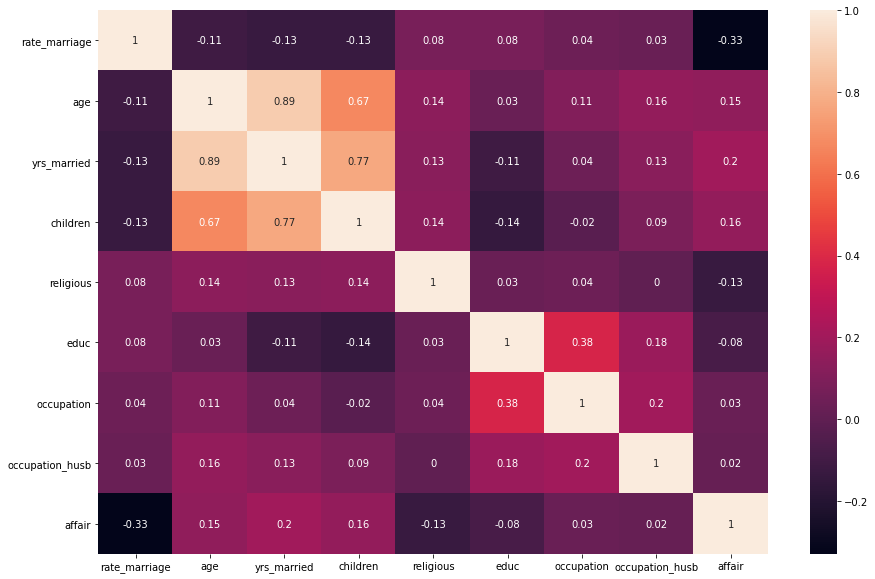

In [10]:
# check corelation and multicolinarity
fig,ax = plt.subplots(figsize=(15,10))
corelation_mat = df.corr().round(2)
sns.heatmap(data=corelation_mat,annot=True,ax=ax)

In [11]:
# investing dataset
#https://medium.com/analytics-vidhya/logistic-regression-to-predict-extra-marital-affair-68ae98bc0e4f
y,x = dmatrices('affair~rate_marriage+age+yrs_married+children+religious+educ \
        +C(occupation) + C(occupation_husb)',df,return_type='dataframe')

In [12]:
df = pd.concat([x,y],axis=1)

In [13]:
df.rename(columns={
    "C(occupation)[T.2.0]": "occ_2", 
    "C(occupation)[T.3.0]": "occ_3",
    "C(occupation)[T.4.0]": "occ_4",
    "C(occupation)[T.5.0]": "occ_5",
    "C(occupation)[T.6.0]": "occ_6",
    "C(occupation_husb)[T.2.0]": "occ_husb_2",
    "C(occupation_husb)[T.3.0]": "occ_husb_3",
    "C(occupation_husb)[T.4.0]": "occ_husb_4",
    "C(occupation_husb)[T.5.0]": "occ_husb_5",
    "C(occupation_husb)[T.6.0]": "occ_husb_6"
    },inplace=True
)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [14]:
# check any value is 0 or not
df.isnull().values.any()

False

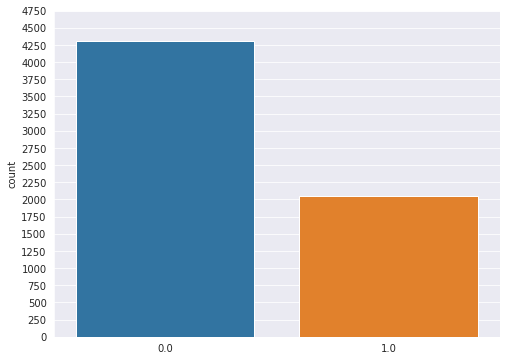

In [15]:
# Check outpout dataset is balanced or not
#df['affair'].unique().count()
aa = df.groupby('affair')['affair'].count()
aa
# imbalance dataset
# show dataset balance in visualization
# catagorial histogram is seaborn count plot
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [16]:
# imbalance dataset make balance with some up sampling